K-MEANS ADJUSTED RAND INDEX WITH SCIKIT-LEARN

In [1]:
#IMPORT STATEMENTS
from sklearn.datasets import load_iris 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import adjusted_rand_score 

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import seaborn as sns 

#Setting sns theme and pandas to display all rows and columns 
sns.set_theme()

In [2]:
#Load iris dataset
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [9]:
print(iris['frame'])

None


In [10]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

EDA

In [11]:
#Load and print the dataset
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
iris_df.shape

(150, 4)

In [13]:
iris_df.isna().sum().T

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
#Getting some basics statistics
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Text(0.5, 0.98, 'Iris histograms')

<Figure size 640x480 with 0 Axes>

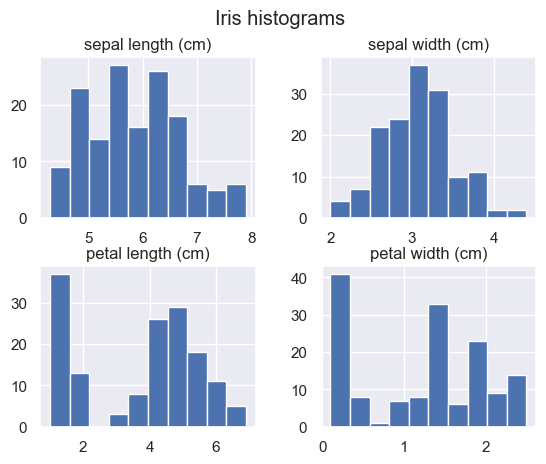

In [15]:
#Plot features
plt.figure()
iris_df.hist()
plt.suptitle("Iris histograms")

<Axes: >

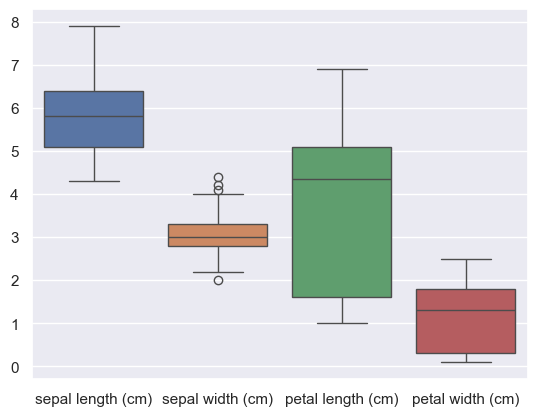

In [16]:
#Boxplots
sns.boxplot(iris_df)

Simplify The Dataset



In [17]:
#Add label to the dataset
iris_df['label'] = [iris['target_names'][target] for target in iris['target']]

#Remove versicolor class
iris_df = iris_df[iris_df['label'] != 'versicolor']

#Keep only petal length and petal width
iris_df = iris_df.filter(items=['petal length (cm)', 'petal width (cm)', 'label'])

In [18]:
iris_df

,petal length (cm),petal width (cm),label
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


Text(0.5, 1.0, 'Data Subset - row features')

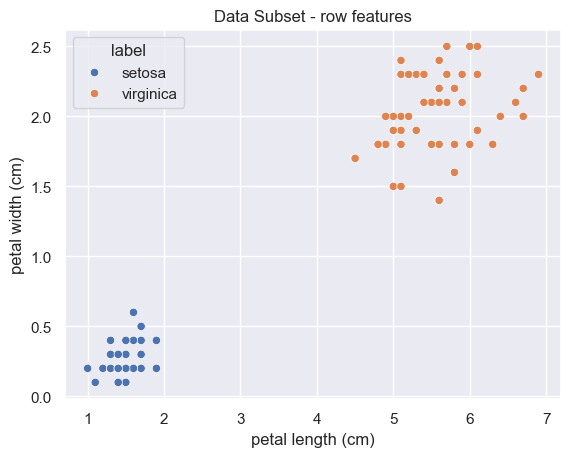

In [19]:
#Making a scatter plot
sns.scatterplot(iris_df, x='petal length (cm)', y='petal width (cm)',hue='label')

plt.title('Data Subset - row features')

Cluster the data without scaling


In [20]:
#Prepare k-means clustering input
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

#Run k-means clustering with 2 clusters 
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans

KMeans(n_clusters=2)

In [21]:
kmeans.fit(cluster_data)

KMeans(n_clusters=2)

In [22]:
#Extract cluster assignment for each data point
iris_df['clusters'] = kmeans.predict(cluster_data)
iris_df

,petal length (cm),petal width (cm),label,clusters
0,1.4,0.2,setosa,0
1,1.4,0.2,setosa,0
2,1.3,0.2,setosa,0
3,1.5,0.2,setosa,0
4,1.4,0.2,setosa,0
...,...,...,...,...
145,5.2,2.3,virginica,1
146,5.0,1.9,virginica,1
147,5.2,2.0,virginica,1
148,5.4,2.3,virginica,1


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

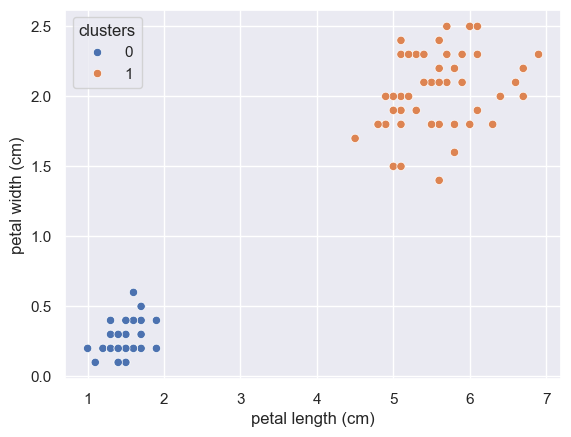

In [23]:
#Visualizing the cluster
sns.scatterplot(iris_df, x='petal length (cm)', y = 'petal width (cm)', hue = 'clusters')

CHECK SIMILARITY AMONG CLUSTERS

Using Adjusted rand index for clustering comparison



In [24]:
#Label values
iris_df['label'].to_numpy()

array([np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setos

In [25]:
#Cluster values
iris_df['clusters'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:
#Adjusted rand index - value of 1 means that original labels and clustering results match perfectly
adjusted_rand_score(iris_df['label'].to_numpy(), iris_df['clusters'].to_numpy())

1.0

In [28]:
print(adjusted_rand_score(iris_df['label'].to_numpy(), iris_df['clusters'].to_numpy()))

1.0


PERFORMING CLIUSTERING AFTER SCALING THE DATA 

In [30]:
#Prepare K-means clustering input 
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

#Normalize the data 
standard_scaler = StandardScaler()
standard_scaler.fit(cluster_data)
cluster_data = standard_scaler.transform(cluster_data)
cluster_data = pd.DataFrame(cluster_data, columns=['petal length (cm)', 'petal width (cm)'])

#Run k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(cluster_data)

KMeans(n_clusters=2)

In [31]:
#Extract cluster assignment for each data point
cluster_data['clusters'] = kmeans.predict(cluster_data)
cluster_data

,petal length (cm),petal width (cm),clusters
0,-1.010688,-1.024617,1
1,-1.010688,-1.024617,1
2,-1.058656,-1.024617,1
3,-0.962720,-1.024617,1
4,-1.010688,-1.024617,1
...,...,...,...
95,0.812100,1.274203,0
96,0.716164,0.836333,0
97,0.812100,0.945800,0
98,0.908036,1.274203,0


Text(0.5, 1.0, 'Scaled data')

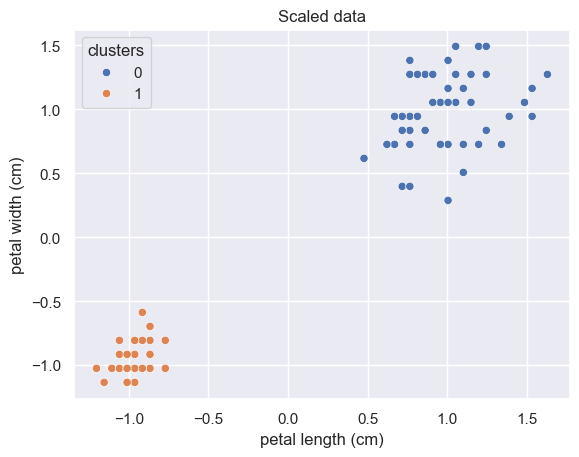

In [32]:
#Plot the clustering
sns.scatterplot(cluster_data, x='petal length (cm)', y='petal width (cm)', hue=cluster_data['clusters'])

plt.title('Scaled data')

In [33]:
#Adjusted rand index
adjusted_rand_score(iris_df['label'].to_numpy(), iris_df['clusters'].to_numpy())

1.0